# Neural Network
Recently, Deep Neural Network becomes very popular in various tasks from Image Classification, Speech Recognizion to NLP. In this notebook, we give an introduction of Neural Network in the context of Classification, it will cover the following topics 

* Neural Network Modeling
* Using NN on toy examples
* Visualize NN

## Neural Network Modeling
The Neural Network has originally been inspired by the goal of modeling our brain system. The one with one hidden layer should have the following diagram

<center><img src='nn_diagram.png'></center>
which is a mathematical model of our biological neuron
<center><img src='neuron.png'></center>

where 
* nucleus: input layer
* cell: a linear combination of input + activation function (to decide whether a cell is activated or not)
* output of a cell is passed to next cell or to axon terminal

Here the activation function can be one of the following form

* $f(x)=\mathrm{sigmoid}(x)=\frac{1}{1 + e^{-x}}$, this activation function 'squashes' input into range between 0 and 1. It's used to be very popular but due to two major drawbacks:
    * sigmoids sature and kill gradient when $x$ is large enough
    * sigmoid outputs are not zero-centered: the output of a neuron is always positive, in consequence, in the backward propagation the derivative is kept fixed sign which can introduce a zig-zagging in dynamics of the gradient updates for the weights. 

* $f(x) = \tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$, this activation is prefered than $\mathrm{sigmoid}$ since it is zero-centered, however it still satures at large $x$

* $f(x) = \mathrm{ReLU}(x) = max(x,0)$ becomes very popular the last few years, since it is very efficient to compute, and it doesn't satures for large positive $x$, however it can cause neuron dies when training (when $x<0$)

In the classification context, the output layer should have $m=$ number of classes. And we can either use Softmax or SVM on the output layer as seen in previous notebooks.

## Special case of NN
### NN without hidden-layer
We notice that NN without hidden layers is simply a linear classifier since we have
$$
o_i = \sum_{k}w_{i,k}x_k + b_i
$$

### NN to act like logic operator XOR
We look at the following input/output for operator **XOR**
$$
\begin{array}{|c|c|c|}
x_1 & x_2 & o \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}
$$
Visualize the input we have
<center><img src='xor_operator.png'></center>
where $o=1$ is labeled by <span style="color:red">red</span> and $o=0$ is labeled by <span style="color:blue">blue</span>.

We can see that this input can't be classified correctly with linear classifier (i.e we can't find $b, w_1, w_2$ such that $b + w_1x_1 + w_2x_2$ is positive at (0,1) and (1,0) and negative at (0,0) and (1,1)).

We can use NN with 2 neuron in hidden-layer with weights and biases
$$
W^{hidden} = \left(\begin{array}{cc}
2  & -2\\
-2 & 2
\end{array}\right), b^{hidden} = \left(\begin{array}{c}
-1\\
-1\end{array}\right)
$$
Then at the hidden-layer we have
$$
\begin{array}{|c|c|}
x_1 & x_2 \\
\hline
0 & 0  \\
0 & 1  \\
1 & 0  \\
1 & 1
\end{array}\xrightarrow{(x_1,x_2)W^{hidden} + b^{hidden}} \begin{array}{|c|c|}
h_1 & h_2 \\
\hline
-1 & -1  \\
-3 & 1  \\
1 & -3  \\
-1 & -1
\end{array}\xrightarrow{ReLU}\begin{array}{|c|c|}
a_1 & a_2 \\
\hline
0 & 0  \\
0 & 1  \\
1 & 0  \\
0 & 0
\end{array}
$$
Then at output layer if we take sum $a_1+a_2$ we would fit perfectly the **XOR** operator.

Next we look at some toy examples using TensorFlow

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# append common path
import sys
COMMON_PATH = '../common'
if COMMON_PATH not in sys.path:
    sys.path.insert(0, COMMON_PATH)
    
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using Neural Network on toy examples
In this part, we will look at toy examples with 2-D inputs that can't be classified by a linear-classifier but can be fitted correctly a basic NN with one hidden layer of 2/3 neurons.

* 2d curve examples
* circle data

This is to illustrate the power of NN. To simply our task, we code some helper module 
* *demo_datas.py* to generate sample data
* *nn_fc_layers.py* to build fully-connected net

## 2D-curve
This toy example is similar to the one from [Colah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)

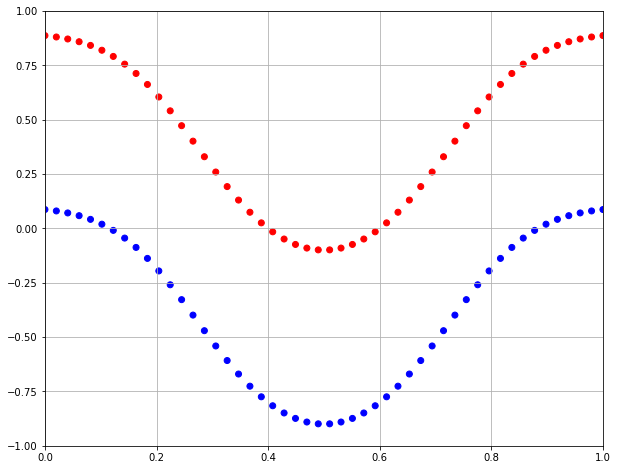

In [12]:
# generate data
from demo_datas import curve2d_data

inputs, outputs = curve2d_data()
colors = np.array(['b'] * len(outputs))
colors[outputs==1]='r'

ax = plt.subplot()
ax.scatter(inputs[:,0], inputs[:,1], c=colors)
ax.set_xlim([0.,1.])
ax.set_ylim([-1.,1.0])
ax.grid(True)

idx = np.arange(len(inputs))
np.random.shuffle(idx)

In [13]:
from nn_fc_layers import FullyConnectedNN

fcnn_2d = FullyConnectedNN([2], learning_rate=1e-1)
batch_size = 10
epochs = 500
opt_w_2d = fcnn_2d.train(inputs[idx], outputs[idx], batch_size, epochs,
                         inputs[idx], outputs[idx],print_every=500)

    0 iter loss =     0.6932 acc = 50.00
  500 iter loss =     0.3090 acc = 80.00
 1000 iter loss =     0.3091 acc = 77.00
 1500 iter loss =     0.3054 acc = 77.00
 2000 iter loss =     0.2957 acc = 80.00
 2500 iter loss =     0.2749 acc = 82.00
 3000 iter loss =     0.2487 acc = 85.00
 3500 iter loss =     0.1829 acc = 93.00
 4000 iter loss =     0.1028 acc = 100.00
 4500 iter loss =     0.0502 acc = 100.00
 4999 iter loss =     0.0287 acc = 100.00


## Circle data
This toy example is similar to the one from [convnetjs](http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

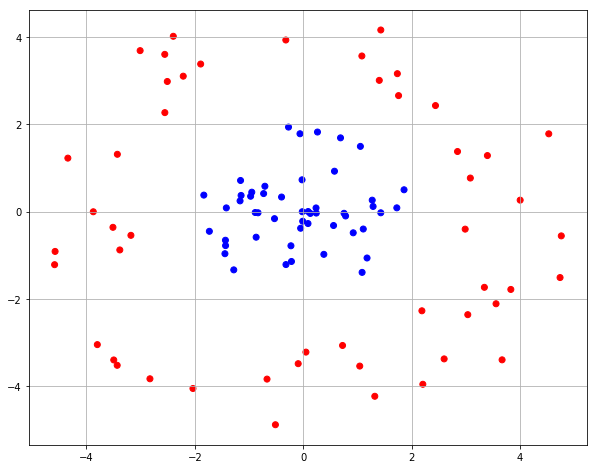

In [14]:
from demo_datas import circle_data

inputs_circle, outputs_circle = circle_data()
colors = np.array(['b'] * len(outputs))
colors[outputs==1]='r'

ax = plt.subplot()
ax.scatter(inputs_circle[:,0], inputs_circle[:,1], c=colors)
ax.grid(True)
idx_circle = np.arange(len(inputs_circle))
np.random.shuffle(idx_circle)

In [15]:
fcnn_circle = FullyConnectedNN([3], learning_rate=1e-1)
batch_size = 10
epochs = 150
opt_w_circle = fcnn_circle.train(inputs_circle[idx_circle], outputs_circle[idx_circle],
                                  batch_size, epochs,
                                  inputs_circle[idx_circle], outputs_circle[idx_circle],
                                  print_every=100)

    0 iter loss =     0.6934 acc = 50.00
  100 iter loss =     0.6932 acc = 50.00
  200 iter loss =     0.6935 acc = 50.00
  300 iter loss =     0.6900 acc = 51.00
  400 iter loss =     0.6823 acc = 41.00
  500 iter loss =     0.6367 acc = 69.00
  600 iter loss =     0.5826 acc = 72.00
  700 iter loss =     0.4846 acc = 83.00
  800 iter loss =     0.4106 acc = 84.00
  900 iter loss =     0.3362 acc = 84.00
 1000 iter loss =     0.2477 acc = 92.00
 1100 iter loss =     0.1807 acc = 100.00
 1200 iter loss =     0.1408 acc = 100.00
 1300 iter loss =     0.1147 acc = 100.00
 1400 iter loss =     0.0960 acc = 100.00
 1499 iter loss =     0.0820 acc = 100.00


We can see that NN with one hidden layer of 2/3 neurons can classify perfectly non linear seperable data. We wonder how is it possible. Let's visualize each layers so that we can understand how it works.

# Visualize NN

## Visualize toy example: 2D curve
Look back at the diagram, at the hidden layer, we have
$$
h_i = \sum_{k}w^{hidden}_{i,k}x_i + b^{hidden}_i\in \mathbb{R}^2
$$
is just an affine transformation of our inputs $\mathbb{R}^2 \mapsto \mathbb{R}^2$ which can be visualize in 2D

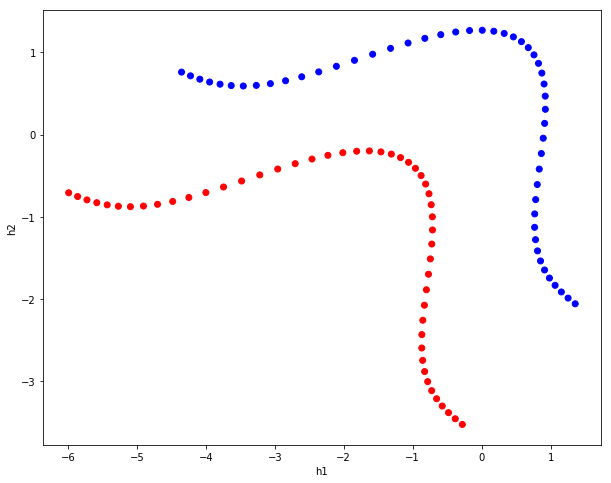

In [16]:
fcnn_2d.visualize('fc_1', opt_w_2d, inputs, outputs)
plt.xlabel('h1')
plt.ylabel('h2')

The next step is to visualize the activation layer, once again this is a non-linear function $\mathbb{R}^2 \mapsto \mathbb{R}^2$ so we can visualize it in 2D in following steps
$$
(a_1,a_2) = (\tanh(h_1),\tanh(h_2))
$$
We also using the output-weights to draw a decision boundary (DB) which defined as below
$$
\mathrm{DB} = \vec{a}=\{a_1, a_2\} \text{ such that } o_1(\vec{a},W^{out}) = o_2(\vec{a},W^{out})
$$


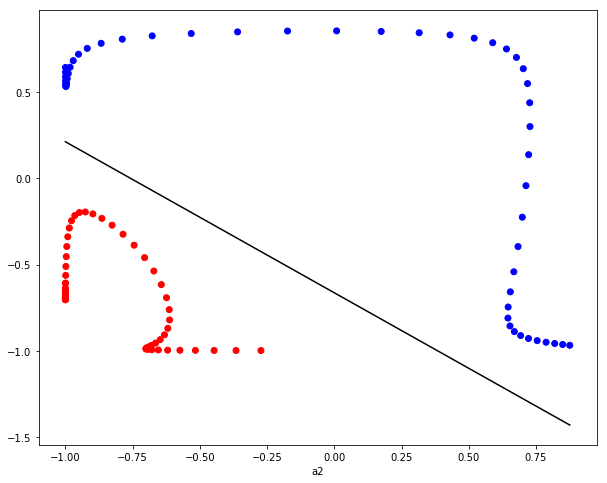

In [17]:
fcnn_2d.visualize('afc_1', opt_w_2d, inputs, outputs, cut_params = {'w' : opt_w_2d['Wo'],
                                                                    'b' : opt_w_2d['bo']})
plt.xlabel('a1')
plt.xlabel('a2')

We can see that the hidden layer using linear transformation + $\tanh$ activation has learnt a new representation of the inputs that is linear seperable. Now let's look at the second examples

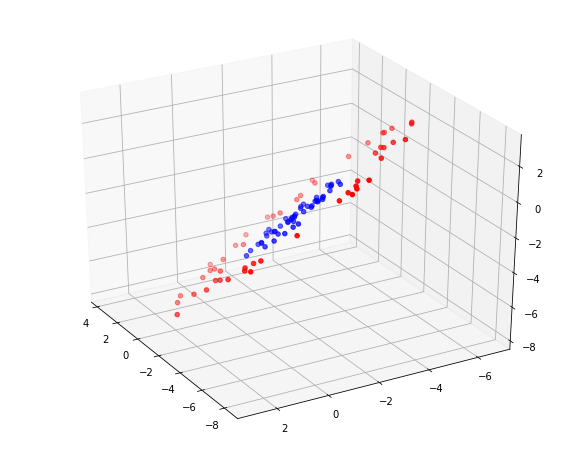

In [33]:
fcnn_circle.visualize('fc_1', opt_w_circle, inputs_circle, outputs_circle)

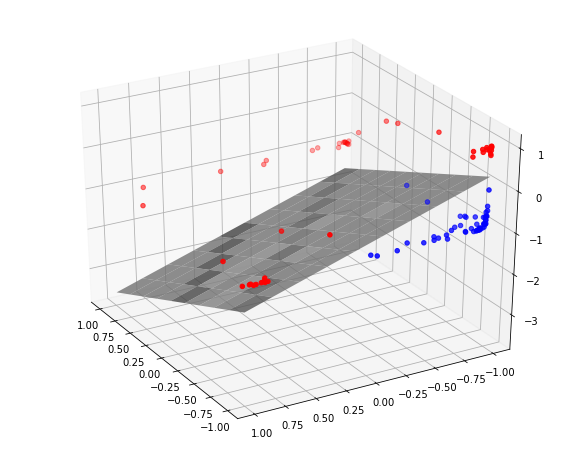

In [36]:
fcnn_circle.visualize('afc_1', opt_w_circle, inputs_circle, outputs_circle, cut_params = {'w' : opt_w_circle['Wo'],
                                                                                          'b' : opt_w_circle['bo']})

Similarly to 2d-example, the hidden-state has learnt a new representation of the input which can be linear-separable by a surface.

# Conclusion

Go through this notebook, we have learnt some basic on Neural Networks and the representation of hidden layer: the hidden-layer combines a linear transformation + a non-linear activation (e.g tanh) has learnt a transformation of inputs => hidden's output that is linear separable. 

The visualization here is only applied to small networks however it sheds some light on how NN works. In real application, we normally work with very deep NN on high dimensional data so we need to use other technique to visualize it e.g embedding.
